# Understanding Linear Regression


Linear Regression is the starting point for many of the beginner Machine Learning enthusiast. This notebook will act like a one stop shop for all the fundamentals related to Linear Regression and the concepts described here will form the basis of upcoming notebooks. We will be working with Finance Dataset and creating a linear regression model from scratch and later on use Scikit-Learn library which provides an out-of-the-box Linear Regression model. 

Prerequisites -
 - Basics of Python
 - Maths (Statistics)

## What is Linear Regression?

Linear regression is a statistically driven algorithm and is the most basic and commonly used predicitve analysis technique. This algorithm comes under ``` Supervised Machine Learning ``` criteria.  As the name suggest, this algorithm uses ```Regression``` as it's base. It mathematically models the unknown or dependent variable and the known or independent variable as a linear equation. For instance, suppose that you have data about your expenses and income for last year. Linear regression techniques analyze this data and determine that your expenses are half your income. They then calculate an unknown future expense by halving a future known income.


We will take a look at **Insurance Dataset** in this notebook to understand more about the topic.

In [1]:
# Importing standard libraries. 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Understanding the Dataset
In this project we will be deciding the Premium which is to be charged to the user using the given dataset. In the code given below I have imported the dataset and as we can see there are several columns provided to us. The charges column indicates the amount of premium charged to the user while rest are the qualities of the user. Hence, charges column will represent our target column and rest of the columns as input columns.

In [2]:
# Loading in the dataset
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
print(f"Shape of the dataframe :- {df.shape}")
print("---")
print(f"Information about the dataset:- ")
df.info()

Shape of the dataframe :- (1338, 7)
---
Information about the dataset:- 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


As you can see from the block of code given above there are 1338 rows (records) and 7 columns (features) in the dataset. Since our data is clean right out of the get go, we can easily jump into the next section of spliting the data.
  
Input Columns
  * age
  * sex 
  * bmi
  * children
  * smoker
  * region


Target Column 
  * charges

In [4]:
df.describe() # By running the describe function from pandas we can see the basic stats related to our dataset. 
              # This will obviously work only on columns with numerical data and not on textual data.

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
# Setting the Datatypes for each columns helps reduce the memory usage
# You can observe that previously the memory usage was 73kb+ and now it is 41.1kb
df = df.astype({'age':'int32','sex':'category', 'smoker':'category', 'region':'category'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1338 non-null   int32   
 1   sex       1338 non-null   category
 2   bmi       1338 non-null   float64 
 3   children  1338 non-null   int64   
 4   smoker    1338 non-null   category
 5   region    1338 non-null   category
 6   charges   1338 non-null   float64 
dtypes: category(3), float64(2), int32(1), int64(1)
memory usage: 41.1 KB


## Standardization vs Normalization

This topic is where most ML beginners get confused. I'll try to be as simple with explaination here as possible, but it'll still require a good bit of prerequisite knowledge of maths.

Feature Scaling is one of the most crucial step in data pre-processing for machine learning. The reason we want to scale features is so that our algorithm does not give importance to one feature over the other and rather treat them as equals. 

From the code block given below, we can see that -
| |AGE|BMI|CHILDREN|
|-----|-----|-----|----------|
| MIN |18|15.96|0|
| MAX |64|53|5|

*Note*: We are ignoring the charges column as that it our target value and only taking into account the **numeric inputs**

As you can see, all the three inputs vary over a large range, this introduces lot of magnitude and since any machine learning algorithm sees numbers, it makes an underlying assumption that bigger number means higher priority. Hence scaling these input values becomes a crucial task.

### 1. Standardization

In this process the data gets scaled in such a way that the values are centered around the mean with a unit standard deviation. This means that the mean that the mean of the attribute becomes 0 and has a unit standard deviation. Let's look at how it's implimented. 

In [6]:
# Creating 2 copies of dataset for demonstration purposes. 
std_df = df[['age', 'bmi', 'children']]     # We'll use this for Standardization (StandardScaler)
nrml_df = df[['age', 'bmi', 'children']]    # And this one for Normalization (MinMax Scaling)
std_df.describe()

,age,bmi,children
count,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918
std,14.049960,6.098187,1.205493
min,18.000000,15.960000,0.000000
25%,27.000000,26.296250,0.000000
50%,39.000000,30.400000,1.000000
75%,51.000000,34.693750,2.000000
max,64.000000,53.130000,5.000000


In [7]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()

std_df = standard_scaler.fit_transform(std_df)
std_df = pd.DataFrame(std_df, columns = ['age','bmi','children'])
std_df.describe()

,age,bmi,children
count,1.338000e+03,1.338000e+03,1.338000e+03
mean,-1.805565e-16,-2.124194e-16,-5.576008e-17
std,1.000374e+00,1.000374e+00,1.000374e+00
min,-1.509965e+00,-2.412011e+00,-9.086137e-01
25%,-8.691547e-01,-7.164063e-01,-9.086137e-01
50%,-1.474046e-02,-4.320880e-02,-7.876719e-02
75%,8.396738e-01,6.611572e-01,7.510793e-01
max,1.765289e+00,3.685522e+00,3.240619e+00


### 2. Normalization
This method scales the min and max value in between 0 to 1, so that the values become range bound and there is no magnitude being introduced. As you can see from code snippet below, the min and max values are 0 and 1 accordingly.

In [8]:
from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler()

nrml_df = minmax_scaler.fit_transform(nrml_df)
nrml_df = pd.DataFrame(nrml_df, columns = ['age','bmi','children'])
nrml_df.describe()

,age,bmi,children
count,1338.000000,1338.000000,1338.000000
mean,0.461022,0.395572,0.218984
std,0.305434,0.164062,0.241099
min,0.000000,0.000000,0.000000
25%,0.195652,0.278080,0.000000
50%,0.456522,0.388485,0.200000
75%,0.717391,0.504002,0.400000
max,1.000000,1.000000,1.000000


Now that we understand the difference between Normalization and Standardization, we will perform normalization on our original dataset.

In [10]:
df['age'] = nrml_df['age']
df['bmi'] = nrml_df['bmi']
df['children'] = nrml_df['children']

In [15]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,0.461022,0.395572,0.218984,13270.422265
std,0.305434,0.164062,0.241099,12110.011237
min,0.000000,0.000000,0.000000,1121.873900
25%,0.195652,0.278080,0.000000,4740.287150
50%,0.456522,0.388485,0.200000,9382.033000
75%,0.717391,0.504002,0.400000,16639.912515
max,1.000000,1.000000,1.000000,63770.428010


Great now that we have that out of the way, we'll have a look at OneHotEncoding and convert our categorical data into OneHotLabels.

## Visualizing data
This step is conducted to gain a rough idea about the dataset by vizual methods. Try to come up with different types of vizualisations to understand the data as best as you can.

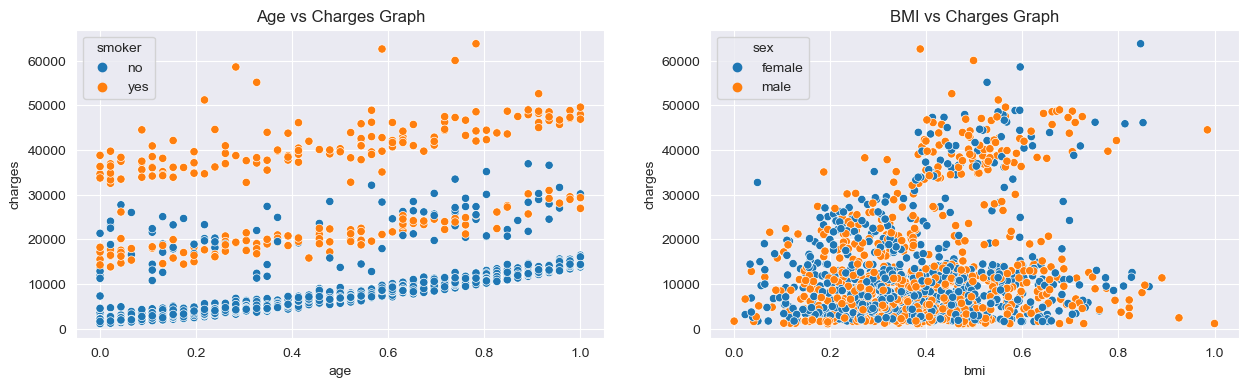

In [11]:
# I am writing some text here visualizing the data
sns.set_style("darkgrid") 
fig, ax = plt.subplots(1,2,figsize=(15,4))
sns.scatterplot(x=df['age'], y=df['charges'], ax=ax[0], hue=df['smoker'])
sns.scatterplot(x=df['bmi'], y=df['charges'], ax=ax[1], hue=df['sex'])
ax[0].set_title("Age vs Charges Graph")
ax[1].set_title("BMI vs Charges Graph")
plt.show()

Observations from the graph -

 * Charges vs age - This chart clearly shows signs of there being linearity.
 * Charges vs bmi - This chart does not show clear signs of linearity.

Eventhough the dataset is not clearly linear we'll try to run Linear regression 

## Correlation between the input variables

Correlation allows us to understand the relationship between the input variables. It is entirely possible that two or more inputs are dependent on each other. For example, if number of experience increases then the salary will also increase, this indicates a positive correlation. Let's take an example of X and Y input variables, then 3 scenarios are possible:  
1. If X increases and Y increases -> This indicates a strong positive correlation.
2. If X increases and Y remains constant -> This indicates weak correlation. 
3. If X increases and Y decreases -> This indicates a strong negative correlation.

In our case, none of the input variables are showing strong relationships indicating they are independant of each other. So we are clear to move ahead.

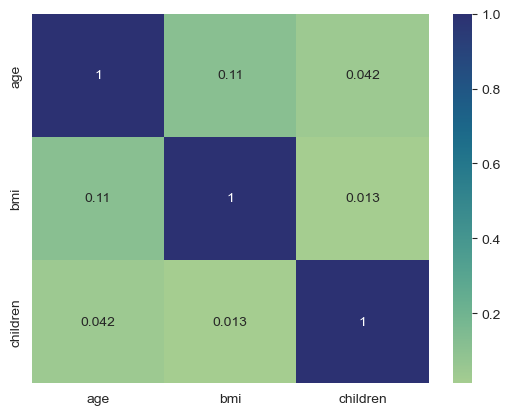

In [12]:
sns.heatmap( df[['age', 'bmi', 'children']].corr(), cmap="crest", annot=True)
plt.show()

## Train Test Split

Now we'll divide the dataset into training and testing data. Ideally you'll divide the dataset into 3 parts i.e. training, validation and testing with 60%, 20%, and 20% split accordingly.